<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EC%9D%B4%EA%B0%80%EC%9D%80/211001_Metrics_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise 종류
### 1) Gaussian Noise
### : 정규 분포를 갖는 noise
### 2) salt_n_pepper_noise
### : Impulse noise에 포함된 noise
### : Impulse noise 란 0 또는 255의 픽셀 값과 같이 뚜렷하게 잘못된 밝기 값을 갖는 noise
### : 소금-후추 noise 로 영상 내에서 검은색, 흰색 점의 형태로 발생
### 3) Uniform Noise
### : 균일한 분포를 갖는 noise
### : 영상의 전체 영역에 대해서 같은 패턴을 갖는 noise 가 일정하게 발생

# Noise 필터
### 1) Median Filter
### : 필터의 크기를 정하고 필터 내의 픽셀 값 추출
### : 픽셀의 크기 순서대로 정렬한 다음 중간 값을 찾아서 출력될 픽셀 값 선택
### 2) Average Filter
### : 출력 픽셀을 얻기 위해 주위 픽셀 값들의 평균 값을 이용
### 3) Gaussian Filter
### : Gaussian 분포를 영상 처리에 적용
### : 정규분포나 확률분포에 의해 생성된 잡음 제거

In [2]:
import numpy as np
import os
import cv2

def salt_n_pepper_noise(image,amount=0.004,s_vs_p=0.5):
    
#     if 2 == len(image.shape):
#         row,col= image.shape
#         ch = 1
        
#     else:
#         row,col,ch = image.shape
        
    #s_vs_p = 0.5
    #amount = 0.004
    
    out = np.copy(image)
    
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    #coords = [np.random.randint(0, i - 1, int(num_salt))
    #          for i in image.shape]
    coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 1
    
    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    #coords = [np.random.randint(0, i - 1, int(num_pepper))
    #          for i in image.shape]
    coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 0
    
    return out

## 색상 공간 변환 함수(cv2.cvtcolor)
dst = cv2.cvtcolor(src, code, dstCn)는 입력 이미지(src), 색상 변환 코드(code), 출력 채널(dstCn)

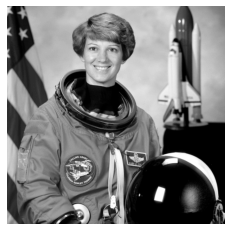

In [3]:
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)

# Noramlize to the range of 0~1 
info = np.iinfo(astro.dtype)
astro = astro/info.max

plt.axis('off')
plt.imshow(astro ,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbb338aced0>,
 Text(0.5, 1.0, '40%'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7fbb33833a50>)

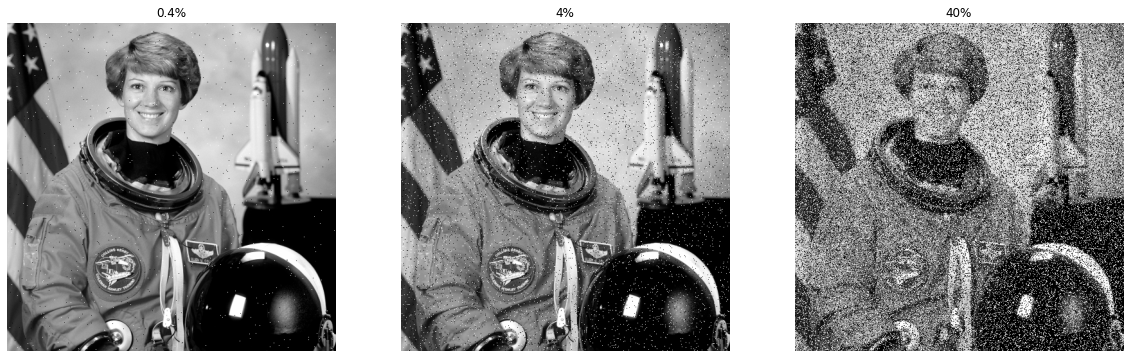

In [11]:
s_vs_p = 0.5
amount1 = 0.004
amount2 = 0.04
amount3 = 0.4

s_p_1 = salt_n_pepper_noise(astro,amount1,s_vs_p)       # salt : 소금, pepper : 후추
s_p_2 = salt_n_pepper_noise(astro,amount2,s_vs_p)       # salt : 소금, pepper : 후추
s_p_3 = salt_n_pepper_noise(astro,amount3,s_vs_p)       # salt : 소금, pepper : 후추

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1), plt.title('0.4%'), plt.axis('off'), plt.imshow(s_p_1 ,cmap='gray')
plt.subplot(1,3,2), plt.title('4%'), plt.axis('off'), plt.imshow(s_p_2 ,cmap='gray')
plt.subplot(1,3,3), plt.title('40%'), plt.axis('off'), plt.imshow(s_p_3 ,cmap='gray')

In [13]:
import math


# MAE - mean absolute error -   평균절대오차 
# 모든 절대 오차의 평균
# 일반적인 회귀 지표는 평균 절대 오차(MAE)
def mae(src,dst):
    return np.mean(np.abs(src-dst))

# mean squared error - 평균 제곱 오차 
# 잔차(오차)의 제곱에 대한 평균을 취한 값
# 회귀에서 자주 사용되는 손실 함수
def mse(src,dst):
    return np.mean((src-dst)**2)

def sse(src,dst):
    return np.sum((src-dst)**2)

# 평균 제곱근 오차(Root Mean Square Error; RMSE)
# 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 
def rmse(src,dst):
    return np.sqrt(mse(src,dst))      

# 최대 신호 대 잡음비(Peak Signal-to-noise ratio, PSNR)
# 신호가 가질 수 있는 최대 전력에 대한 잡음의 전력
def psnr(src,dst):
    mse = np.mean((src-dst)**2)
    if mse == 0:
        return math.inf
    MAX=1                       # normalization 0~1 로
    return 20* math.log10(MAX/math.sqrt(mse))

In [15]:
s_p_04 = salt_n_pepper_noise(astro,amount1,s_vs_p) 

In [16]:
print('mae = {:.4f}'.format(mae(astro,s_p_04)))
print('mse = {:.4f}'.format(mse(astro,s_p_04)))
print('sse = {:.4f}'.format(sse(astro,s_p_04)))
print('rmse= {:.4f}'.format(rmse(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))

mae = 0.0020
mse = 0.0014
sse = 360.8372
rmse= 0.0371
psnr= 28.6123


psnr= 9.5960
psnr= 18.7852
psnr= 28.6816
psnr= inf


(<matplotlib.axes._subplots.AxesSubplot at 0x7fbb336dca90>,
 Text(0.5, 1.0, 'original'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7fbb33655f10>)

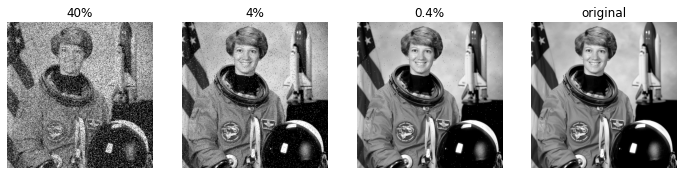

In [17]:

amount=0.004
s_p_04 = salt_n_pepper_noise(astro,amount,s_vs_p)         # salt : 소금, pepper : 후추

amount=0.04
s_p_4 = salt_n_pepper_noise(astro,amount,s_vs_p)

amount=0.4
s_p_40 = salt_n_pepper_noise(astro,amount,s_vs_p)


print('psnr= {:.4f}'.format(psnr(astro,s_p_40)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_4)))
print('psnr= {:.4f}'.format(psnr(astro,s_p_04)))
print('psnr= {:.4f}'.format(psnr(astro,astro)))       # 자기자신.. infinite

plt.figure(figsize=(12,18))
plt.subplot(141), plt.title('40%'),plt.axis('off'),plt.imshow(s_p_40,cmap='gray')
plt.subplot(142), plt.title('4%'),plt.axis('off'),plt.imshow(s_p_4,cmap='gray')
plt.subplot(143), plt.title('0.4%'),plt.axis('off'),plt.imshow(s_p_04,cmap='gray')
plt.subplot(144), plt.title('original'),plt.axis('off'),plt.imshow(astro,cmap='gray')